In [36]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Generate dates for 2022-2023
start_date = datetime(2022, 1, 1)
dates = [start_date + timedelta(days=x) for x in range(365*2)]

# Define channels with specific characteristics
channels = {
    'Facebook': {'trend': 1.2, 'seasonality': 0.3, 'volatility': 0.15},
    'Google Ads': {'trend': 0.9, 'seasonality': 0.1, 'volatility': 0.1},
    'TikTok': {'trend': 1.8, 'seasonality': 0.4, 'volatility': 0.25},
    'Instagram': {'trend': 1.5, 'seasonality': 0.3, 'volatility': 0.2},
    'YouTube': {'trend': 1.1, 'seasonality': 0.2, 'volatility': 0.15},
    'Twitter': {'trend': 0.7, 'seasonality': 0.2, 'volatility': 0.3}
}

campaign_types = ['App_Install', 'Brand_Awareness', 'Lead_Generation', 'Retargeting', 'Promotional']
regions = ['US_West', 'US_East', 'EU', 'APAC', 'LATAM']

def apply_trend(base_value, month_index, channel_params):
    trend_factor = 1 + (month_index * 0.02 * channel_params['trend'])
    return base_value * trend_factor

def apply_seasonality(value, month, channel_params):
    season_factor = 1.0
    if month in [11, 12]:  # Holiday season
        season_factor += 0.4 * channel_params['seasonality']
    elif month in [1, 2]:  # Post-holiday slump
        season_factor -= 0.3 * channel_params['seasonality']
    elif month in [6, 7, 8]:  # Summer variation
        season_factor -= 0.2 * channel_params['seasonality']
    elif month in [3, 4]:  # Spring boost
        season_factor += 0.2 * channel_params['seasonality']
    
    return value * season_factor

def add_market_shock(value, date, channel_params):
    if np.random.random() < 0.05:  # 5% chance of shock
        shock_factor = np.random.normal(1, channel_params['volatility'])
        return value * shock_factor
    return value

data = []
for date in dates:
    month_index = (date.year - 2022) * 12 + date.month - 1
    
    for channel in channels:
        channel_params = channels[channel]
        
        for campaign_type in campaign_types:
            for region in regions:
                if np.random.random() > 0.6:
                    # Scaled down base metrics
                    base_impressions = np.random.normal(1000, 300)  # Reduced from 100000
                    
                    # Apply channel-specific trends and seasonality
                    base_impressions = apply_trend(base_impressions, month_index, channel_params)
                    base_impressions = apply_seasonality(base_impressions, date.month, channel_params)
                    base_impressions = add_market_shock(base_impressions, date, channel_params)
                    
                    # Conversion rates vary by channel
                    channel_conv_rate = np.random.normal(
                        0.08 * channel_params['trend'],
                        0.02 * channel_params['volatility']
                    )
                    
                    clicks = int(base_impressions * channel_conv_rate)
                    conversions = int(clicks * np.random.normal(0.1, 0.02))
                    installs = int(conversions * np.random.normal(0.8, 0.1))
                    
                    # Cost and revenue calculations (scaled down)
                    cost_per_click = np.random.normal(0.5, 0.15) * channel_params['trend']
                    cost = clicks * cost_per_click
                    
                    revenue_per_conversion = np.random.normal(50, 10)  # Reduced from 80
                    revenue = conversions * revenue_per_conversion
                    
                    # Apply market conditions
                    if date.month in [11, 12]:  # Holiday season
                        revenue *= 1.4
                    elif date.month in [1, 2]:  # Post-holiday
                        revenue *= 0.7
                    
                    month_year = date.strftime('%Y-%m')
                    
                    row = {
                        'month_year': month_year,
                        'Channel': channel,
                        'Campaign_Type': campaign_type,
                        'Region': region,
                        'Impressions': int(base_impressions),
                        'Clicks': clicks,
                        'Conversions': conversions,
                        'Installs': installs,
                        'Cost': round(cost, 2),
                        'Revenue': round(revenue, 2),
                        'Profit': round(revenue - cost, 2)
                    }
                    data.append(row)

# Create DataFrame
mktg = pd.DataFrame(data)

# Save to CSV
mktg.to_csv('marketing_performance_2022_2023.csv', index=False)

mktg.columns = mktg.columns.str.lower()

# Print sample and stats
mktg.head(5)

,month_year,channel,campaign_type,region,impressions,clicks,conversions,installs,cost,revenue,profit
0,2022-01,Facebook,App_Install,US_East,1086,109,11,9,54.00,344.56,290.56
1,2022-01,Facebook,Brand_Awareness,EU,793,74,9,6,45.30,225.24,179.94
2,2022-01,Facebook,Lead_Generation,US_West,746,73,6,5,43.62,165.58,121.95
3,2022-01,Facebook,Lead_Generation,EU,1134,104,16,14,66.49,658.76,592.26
4,2022-01,Facebook,Lead_Generation,APAC,878,83,9,6,29.68,259.52,229.84


In [37]:
agg_mktg = mktg.groupby('month_year').agg({'impressions': 'sum', 'clicks': 'sum', 'conversions': 'sum', 'installs': 'sum', 'cost': 'sum', 'revenue': 'sum', 'profit': 'sum'}).reset_index()
agg_mktg

,month_year,impressions,clicks,conversions,installs,cost,revenue,profit
0,2022-01,1693770,160476,15178,11217,105181.17,532917.88,427736.63
1,2022-02,1605437,151570,14312,10602,98600.21,505662.21,407061.83
2,2022-03,2087336,200607,19180,14467,130816.93,954790.47,823973.40
3,2022-04,2038055,199467,19031,14354,133089.99,953186.53,820096.48
4,2022-05,2031431,194319,18555,13915,128164.01,925251.26,797087.43
5,2022-06,1891924,181853,17340,12916,120059.45,865975.97,745916.36
6,2022-07,2053511,196787,18752,14038,128813.33,929849.35,801036.07
7,2022-08,2083430,202013,19311,14467,133842.68,973795.10,839952.31
8,2022-09,2171195,206793,19700,14867,137319.30,978450.05,841130.87
9,2022-10,2259420,220222,21235,16157,147116.40,1061257.15,914140.93


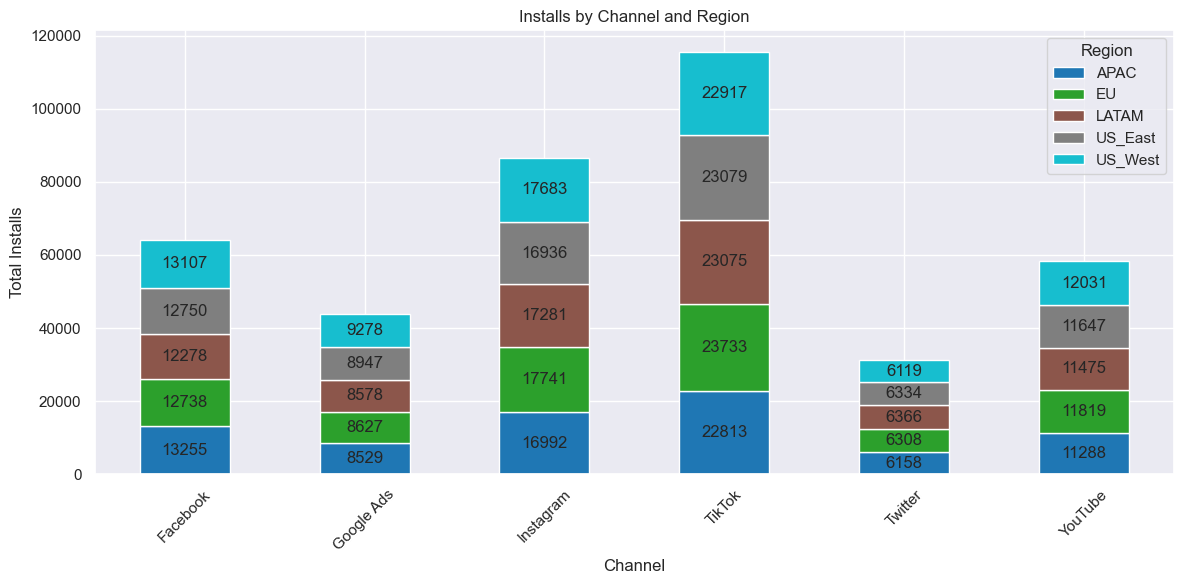

In [ ]:

# Aggregate installs by channel and region
aggregated_installs = mktg.groupby(['channel', 'region'], as_index=False)['installs'].sum()

# Pivot the data for stacking
pivot_data = aggregated_installs.pivot(index='channel', columns='region', values='installs').fillna(0)

# Plot the stacked bar chart
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')

# Add install counts in each box
for container in ax.containers:
    ax.bar_label(container, label_type='center')

# Formatting
plt.title("Installs by Channel and Region")
plt.xlabel("Channel")
plt.ylabel("Total Installs")
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/ms/kffv8scn23l62n_5h2kgw9sw0000gn/T/ipykernel_36656/2271834186.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45)


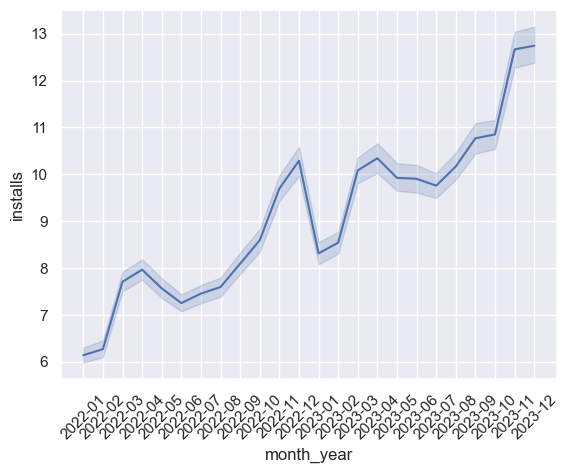

In [ ]:
sns.set_theme(style="darkgrid")

# Create a bar plot
g = sns.lineplot(data=mktg, x='month_year', y='installs')
# Rotate the x-axis labels by 45 degrees
g.set_xticklabels(g.get_xticklabels(), rotation=45)


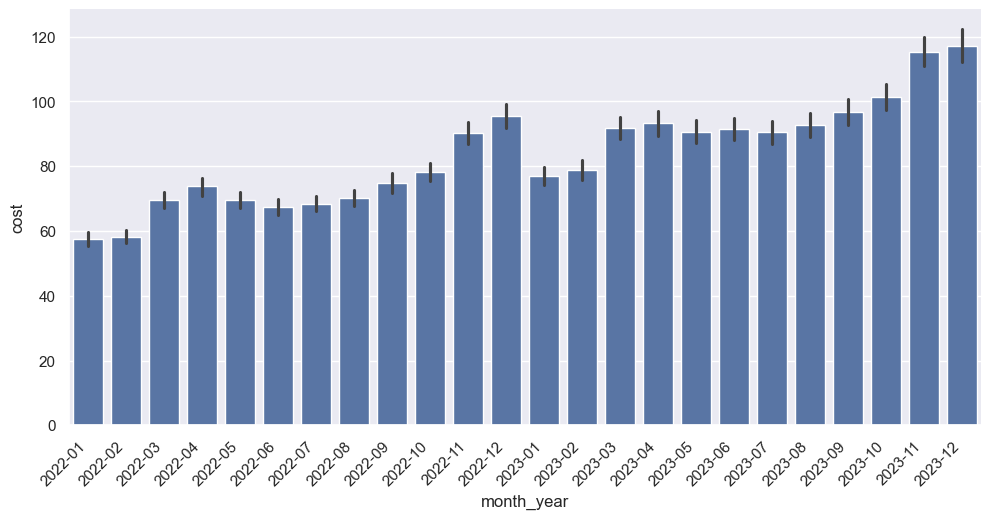

In [38]:
# Your existing code
plot = sns.catplot(data=mktg, x='month_year', y='cost', kind='bar', height=5, aspect=2)

# Rotate x-axis labels
plot.set_xticklabels(rotation=45, ha='right')

# Show the plot
plt.show()

AttributeError: module 'seaborn' has no attribute 'plt'

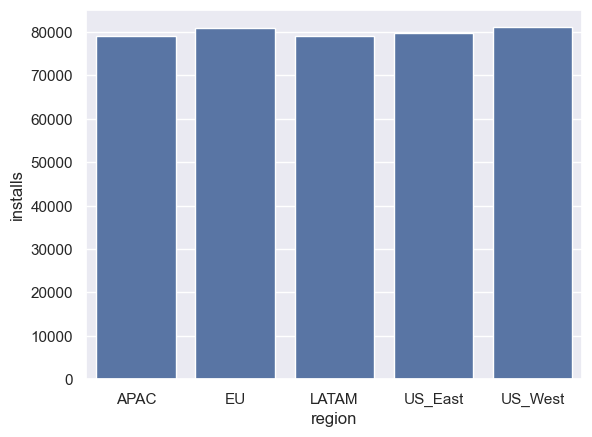

In [ ]:
# Aggregate installs by region
aggregated_data = mktg.groupby('region')['installs'].sum().reset_index()

# Set the theme
sns.set_theme(style="darkgrid")

# Create a bar plot
sns.barplot(data=aggregated_data, x='region', y='installs')

# Show the plot
sns.plt.show()

<Figure size 1500x1000 with 0 Axes>

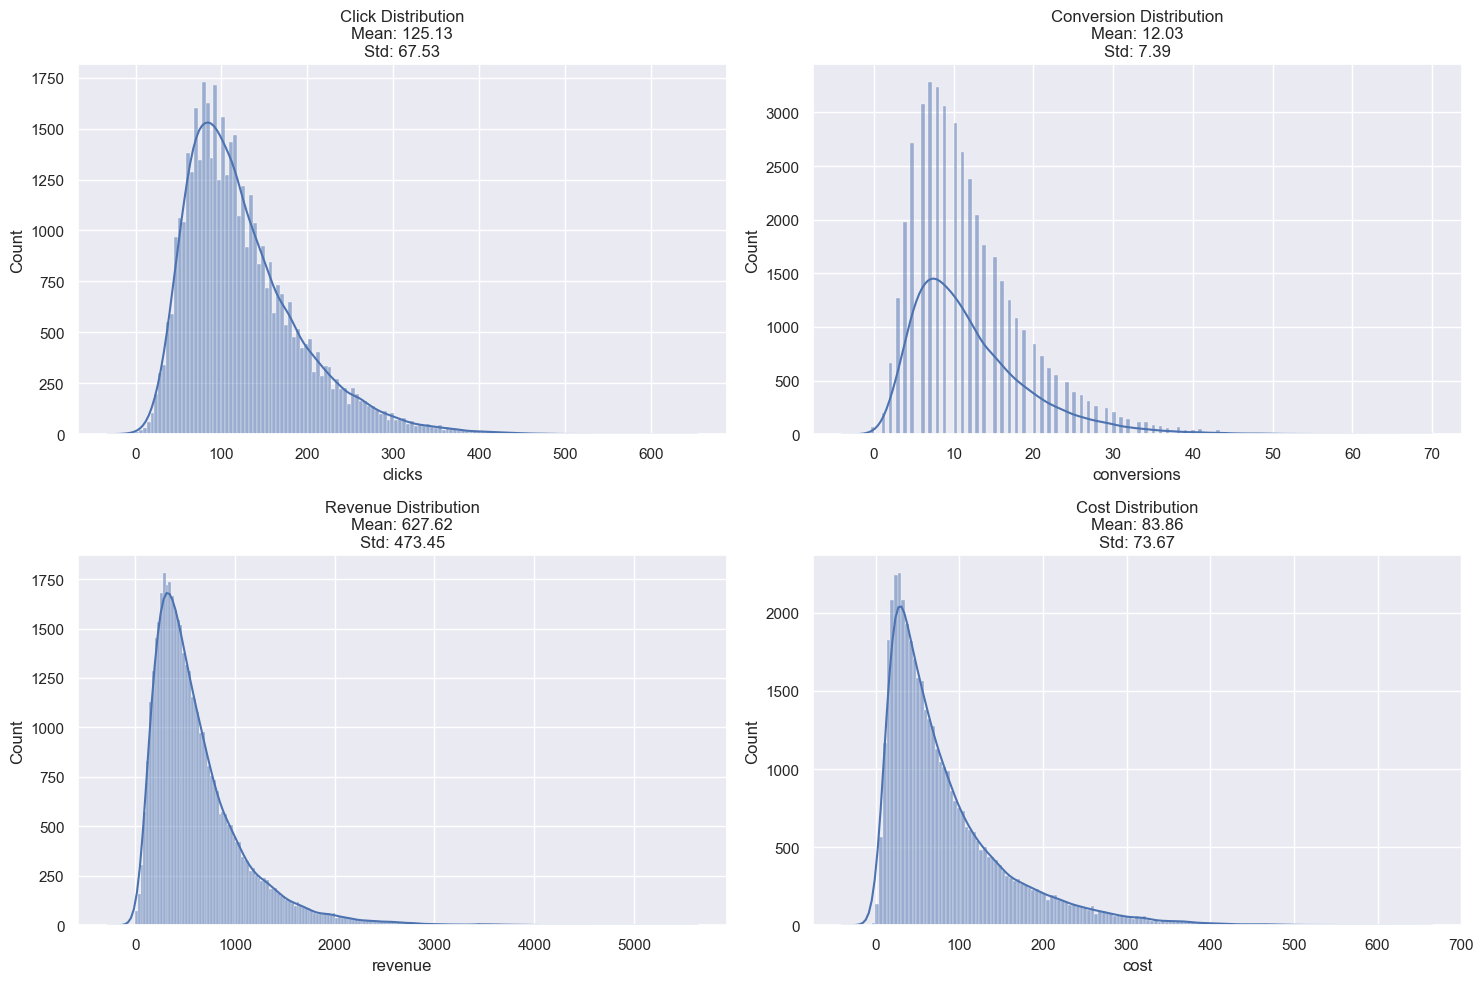

In [39]:
# Distribution Analysis
plt.figure(figsize=(15, 10))

# Create subplot grid
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Distribution plots with statistical info
sns.histplot(data=mktg, x='clicks', kde=True, ax=ax1)
ax1.set_title(f'Click Distribution\nMean: {mktg.clicks.mean():.2f}\nStd: {mktg.clicks.std():.2f}')

sns.histplot(data=mktg, x='conversions', kde=True, ax=ax2)
ax2.set_title(f'Conversion Distribution\nMean: {mktg.conversions.mean():.2f}\nStd: {mktg.conversions.std():.2f}')

sns.histplot(data=mktg, x='revenue', kde=True, ax=ax3)
ax3.set_title(f'Revenue Distribution\nMean: {mktg.revenue.mean():.2f}\nStd: {mktg.revenue.std():.2f}')

sns.histplot(data=mktg, x='cost', kde=True, ax=ax4)
ax4.set_title(f'Cost Distribution\nMean: {mktg.cost.mean():.2f}\nStd: {mktg.cost.std():.2f}')

plt.tight_layout()

# Distribution Shape

- **Right-Skewed Distribution**:  
  The data shows a right-skewed (positively skewed) distribution.  
  - Most clicks fall between **0-200**, with the **peak around 100** clicks.  
  - A long "tail" extends to the right, indicating some campaigns achieve much higher clicks (up to **600**).

---

# Key Statistics

- **Mean (average)**: **125.13 clicks**  
- **Standard Deviation**: **67.53 clicks**

### Interpretation:
- **68% of campaigns** fall between:
  - **58 clicks**: \(125 - 67\)
  - **193 clicks**: \(125 + 67\)
- Campaigns outside this range might be:
  - **Underperforming** or
  - **Exceptionally successful**

---

# Practical Interpretation

- The **most common outcome**: Around **100 clicks** per campaign.
- **Very few campaigns** achieve more than **400 clicks**.
- Use the following ranges to classify performance:
  - **Below 58 clicks**: Underperforming
  - **58-193 clicks**: Normal performance range
  - **Above 193 clicks**: Exceptionally good performance

---

# Business Insights

- **Set Realistic Goals**:
  - Use this data to establish achievable benchmarks for campaigns.
- **Optimization Opportunities**:
  - Focus on campaigns with **less than 58 clicks** for potential improvements.
- **Learn from Outliers**:
  - Analyze high-performing campaigns (**300+ clicks**) to replicate their success.
- **Performance Benchmarks**:
  - Use these ranges to set targets for future campaigns.

Text(0.5, 1.0, 'Correlation Matrix of Key Metrics')

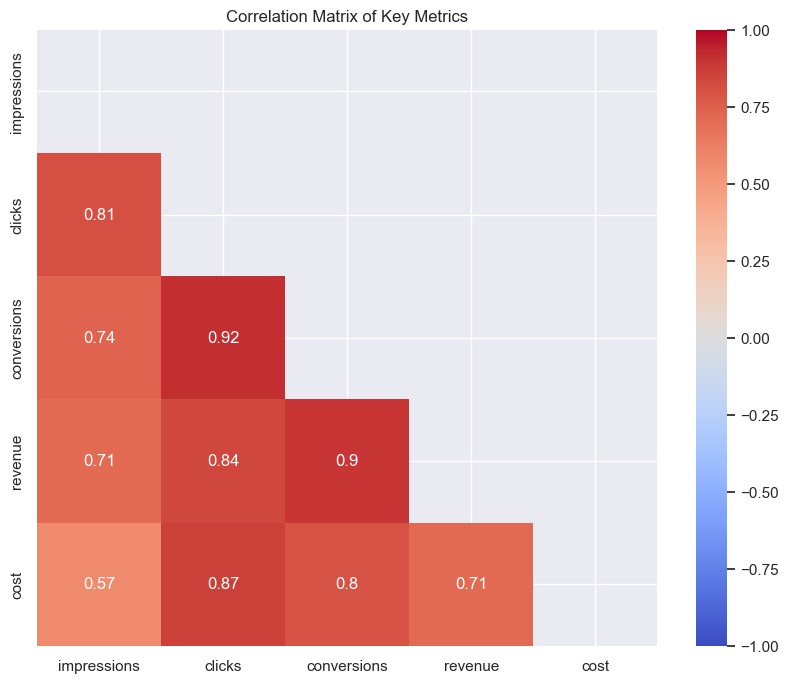

In [40]:
# 2. Correlation Analysis
plt.figure(figsize=(10, 8))
correlation_matrix = mktg[['impressions', 'clicks', 'conversions', 'revenue', 'cost']].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Key Metrics')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Facebook'),
  Text(1, 0, 'Google Ads'),
  Text(2, 0, 'TikTok'),
  Text(3, 0, 'Instagram'),
  Text(4, 0, 'YouTube'),
  Text(5, 0, 'Twitter')])

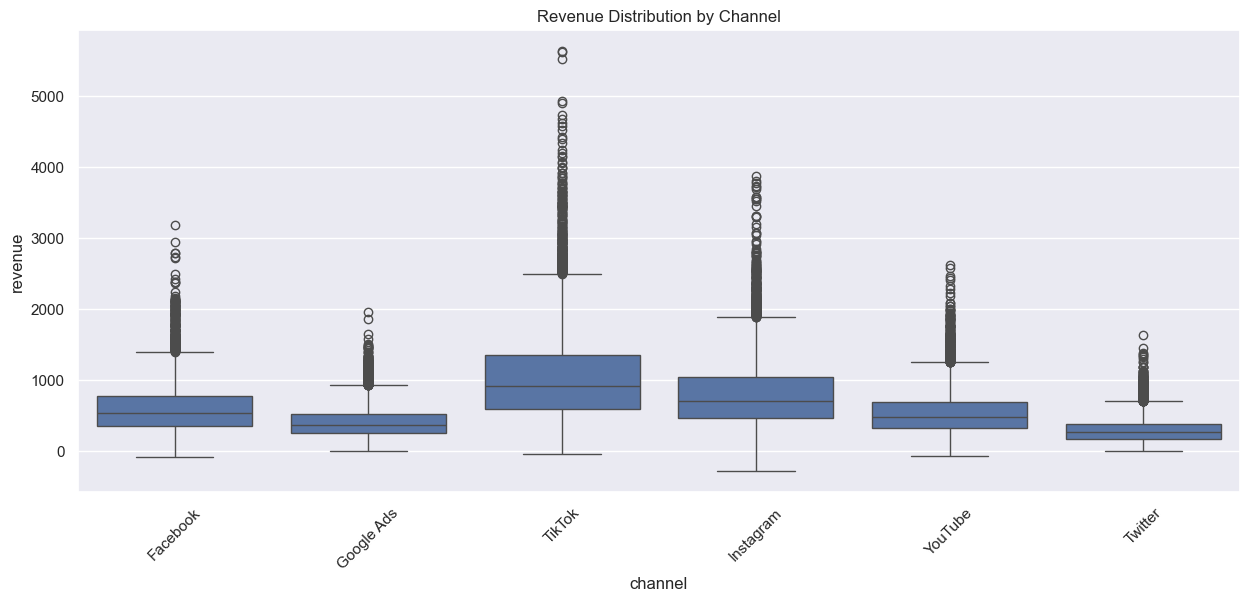

In [41]:
# 3. Channel Performance Box Plots
plt.figure(figsize=(15, 6))
sns.boxplot(x='channel', y='revenue', data=mktg)
plt.title('Revenue Distribution by Channel')
plt.xticks(rotation=45)

Text(0, 0.5, 'Average Revenue')

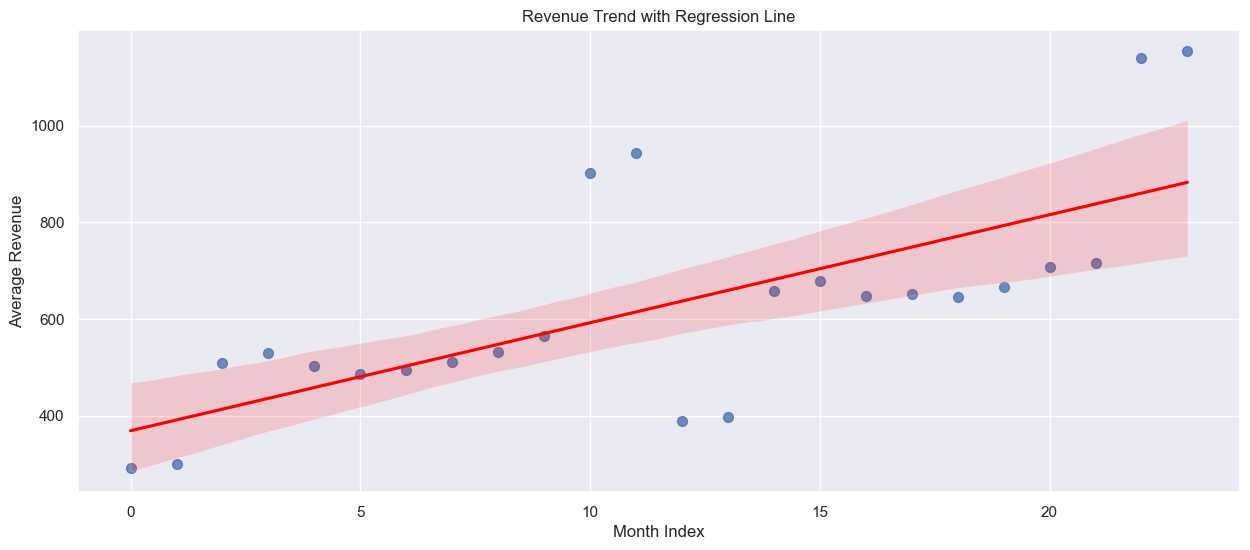

In [42]:
# 4. Time Series Analysis
# Convert month_year to datetime
agg_mktg['month_year'] = pd.to_datetime(mktg['month_year'])

# Create time series plot with confidence intervals
plt.figure(figsize=(15, 6))
sns.regplot(x=np.arange(len(mktg['month_year'].unique())), 
            y=mktg.groupby('month_year')['revenue'].mean(),
            scatter_kws={'s': 50},
            line_kws={'color': 'red'})
plt.title('Revenue Trend with Regression Line')
plt.xlabel('Month Index')
plt.ylabel('Average Revenue')

In [43]:
# 5. Statistical Tests and Channel Comparison
def channel_statistics(data):
    # Perform one-way ANOVA test
    channels = data['channel'].unique()
    channel_groups = [data[data['channel'] == channel]['revenue'] for channel in channels]
    f_stat, p_value = stats.f_oneway(*channel_groups)
    
    # Create summary statistics
    summary = data.groupby('channel').agg({
        'revenue': ['mean', 'std', 'count'],
        'conversions': ['mean', 'std'],
        'cost': ['mean', 'std']
    }).round(2)
    
    return summary, f_stat, p_value

# Assuming df is your DataFrame
summary_stats, f_stat, p_value = channel_statistics(mktg)
print("\nChannel Performance Statistics:")
print(summary_stats)
print(f"\nOne-way ANOVA test results:")
print(f"F-statistic: {f_stat:.2f}")
print(f"p-value: {p_value:.4f}")


Channel Performance Statistics:
            revenue               conversions          cost       
               mean     std count        mean   std    mean    std
channel                                                           
Facebook     612.80  358.69  7177       11.79  5.09   73.83  35.33
Google Ads   419.13  224.35  7279        8.17  3.34   38.91  17.68
Instagram    815.91  479.24  7249       15.61  6.75  120.48  57.55
TikTok      1056.51  651.81  7432       20.08  9.21  184.97  92.49
Twitter      306.58  179.38  7373        5.94  2.64   22.70  10.70
YouTube      551.03  316.29  7329       10.55  4.45   61.08  28.07

One-way ANOVA test results:
F-statistic: 3398.08
p-value: 0.0000


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Facebook'),
  Text(1, 0, 'Google Ads'),
  Text(2, 0, 'TikTok'),
  Text(3, 0, 'Instagram'),
  Text(4, 0, 'YouTube'),
  Text(5, 0, 'Twitter')])

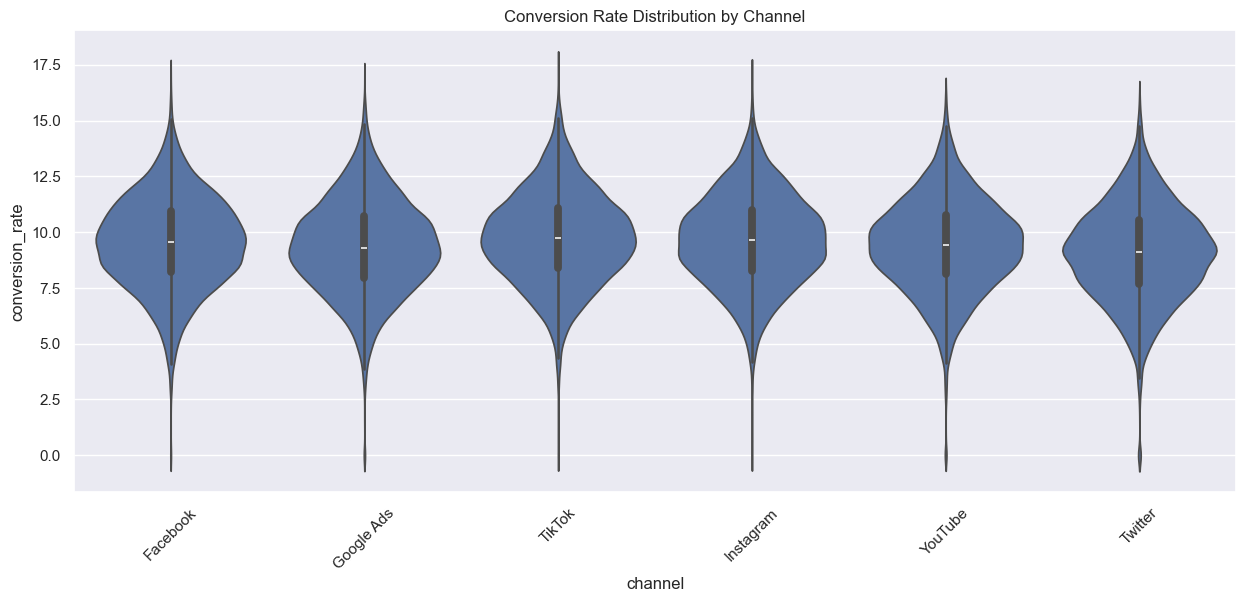

In [44]:
# 6. Conversion Rate Analysis
plt.figure(figsize=(15, 6))
mktg['conversion_rate'] = mktg['conversions'] / mktg['clicks'] * 100

sns.violinplot(x='channel', y='conversion_rate', data=mktg)
plt.title('Conversion Rate Distribution by Channel')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'App_Install'),
  Text(1, 0, 'Brand_Awareness'),
  Text(2, 0, 'Lead_Generation'),
  Text(3, 0, 'Promotional'),
  Text(4, 0, 'Retargeting')])

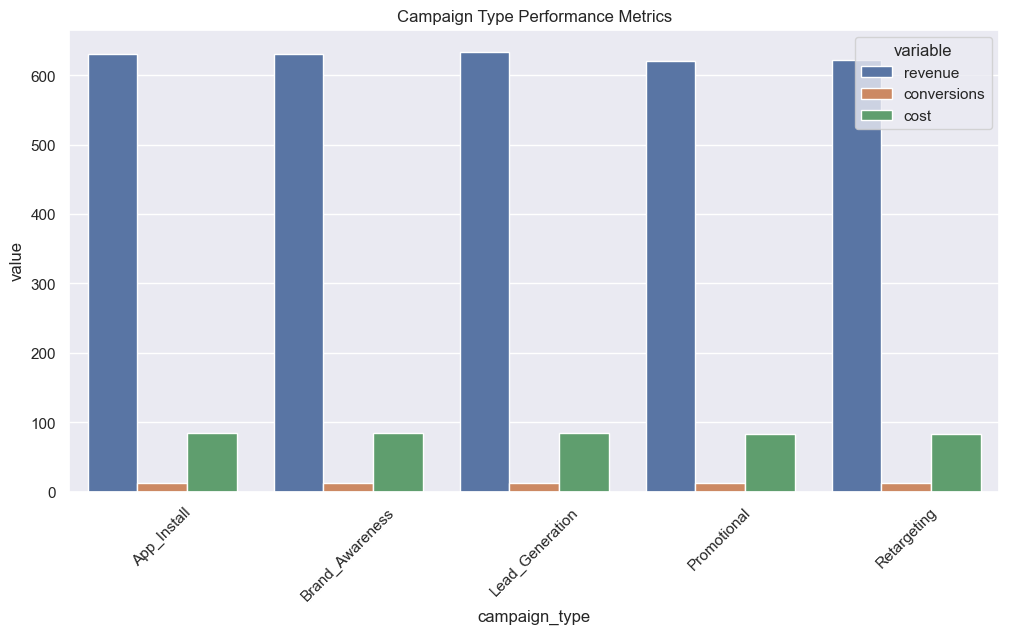

In [45]:
# 7. Campaign Type Performance
plt.figure(figsize=(12, 6))
campaign_performance = mktg.groupby('campaign_type').agg({
    'revenue': 'mean',
    'conversions': 'mean',
    'cost': 'mean'
}).reset_index()

campaign_performance_melted = pd.melt(campaign_performance, 
                                    id_vars=['campaign_type'],
                                    value_vars=['revenue', 'conversions', 'cost'])

sns.barplot(x='campaign_type', y='value', hue='variable', data=campaign_performance_melted)
plt.title('Campaign Type Performance Metrics')
plt.xticks(rotation=45)


([0, 1, 2, 3, 4],
 [Text(0, 0, 'US_East'),
  Text(1, 0, 'EU'),
  Text(2, 0, 'US_West'),
  Text(3, 0, 'APAC'),
  Text(4, 0, 'LATAM')])

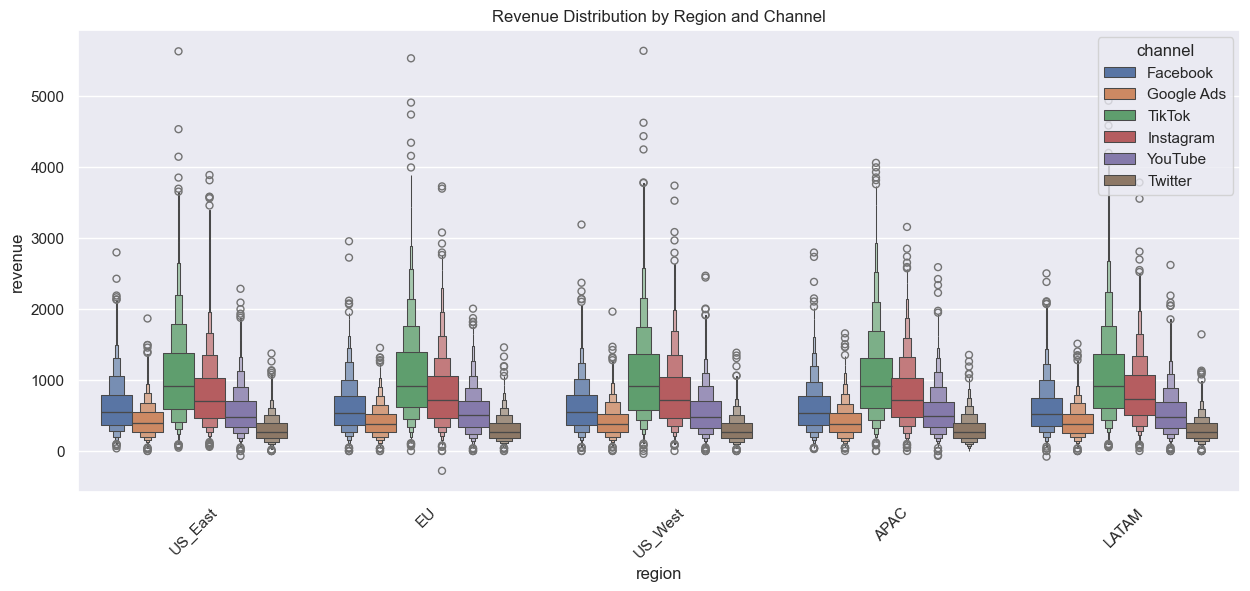

In [46]:
# 8. Regional Performance Analysis
plt.figure(figsize=(15, 6))
sns.boxenplot(x='region', y='revenue', hue='channel', data=mktg)
plt.title('Revenue Distribution by Region and Channel')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Cost vs Revenue by Channel')

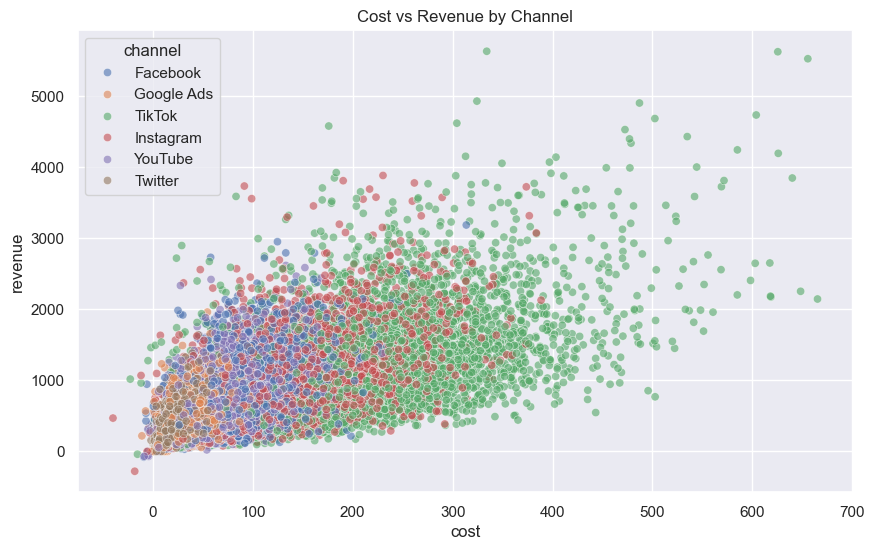

In [47]:
# 9. Cost-Revenue Relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mktg, x='cost', y='revenue', hue='channel', alpha=0.6)
plt.title('Cost vs Revenue by Channel')

<Axes: xlabel='cost', ylabel='revenue'>

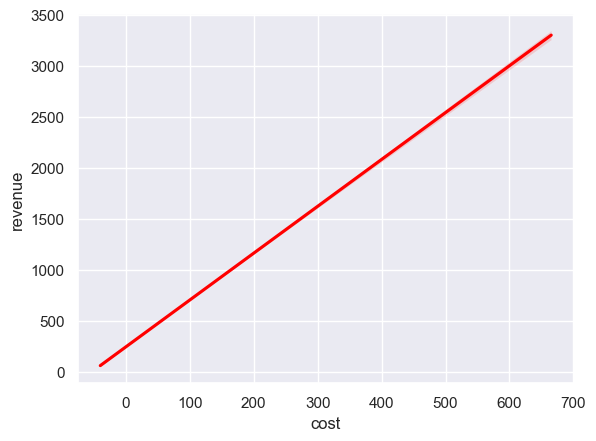

In [48]:
# Adding regression line
sns.regplot(data=mktg, x='cost', y='revenue', scatter=False, color='red')


In [51]:
mktg.head(15)

,month_year,channel,campaign_type,region,impressions,clicks,conversions,installs,cost,revenue,profit,conversion_rate
0,2022-01,Facebook,App_Install,US_East,1086,109,11,9,54.00,344.56,290.56,10.091743
1,2022-01,Facebook,Brand_Awareness,EU,793,74,9,6,45.30,225.24,179.94,12.162162
2,2022-01,Facebook,Lead_Generation,US_West,746,73,6,5,43.62,165.58,121.95,8.219178
3,2022-01,Facebook,Lead_Generation,EU,1134,104,16,14,66.49,658.76,592.26,15.384615
4,2022-01,Facebook,Lead_Generation,APAC,878,83,9,6,29.68,259.52,229.84,10.843373
5,2022-01,Facebook,Retargeting,US_East,791,77,9,8,56.66,301.95,245.28,11.688312
6,2022-01,Facebook,Retargeting,APAC,739,69,6,4,26.54,244.13,217.58,8.695652
7,2022-01,Facebook,Retargeting,LATAM,1280,124,10,8,108.73,347.49,238.76,8.064516
8,2022-01,Google Ads,App_Install,US_West,1425,105,10,7,26.06,294.75,268.69,9.523810
9,2022-01,Google Ads,App_Install,LATAM,1186,87,9,6,45.18,321.12,275.94,10.344828


In [52]:
agg_mktg = mktg.groupby('month_year').agg({'impressions': 'sum', 'clicks': 'sum', 'conversions': 'sum', 'installs': 'sum', 'cost': 'sum', 'revenue': 'sum', 'profit': 'sum'}).reset_index()
agg_mktg

,month_year,impressions,clicks,conversions,installs,cost,revenue,profit
0,2022-01,1693770,160476,15178,11217,105181.17,532917.88,427736.63
1,2022-02,1605437,151570,14312,10602,98600.21,505662.21,407061.83
2,2022-03,2087336,200607,19180,14467,130816.93,954790.47,823973.40
3,2022-04,2038055,199467,19031,14354,133089.99,953186.53,820096.48
4,2022-05,2031431,194319,18555,13915,128164.01,925251.26,797087.43
5,2022-06,1891924,181853,17340,12916,120059.45,865975.97,745916.36
6,2022-07,2053511,196787,18752,14038,128813.33,929849.35,801036.07
7,2022-08,2083430,202013,19311,14467,133842.68,973795.10,839952.31
8,2022-09,2171195,206793,19700,14867,137319.30,978450.05,841130.87
9,2022-10,2259420,220222,21235,16157,147116.40,1061257.15,914140.93
